<a href="https://colab.research.google.com/github/Golovin-3021/labs/blob/main/lab_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [105]:
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from numpy.random import seed

Реализация базового класса Perceptron

In [106]:
class Perceptron ():
    def __init__(self, lr=0.01, n_iter=10):
        self.lr=lr
        self.n_iter=n_iter

    def fit(self, X,y):
        self.w_=np.zeros(1+X.shape[1])
        self.errors_=[]
        for _ in range(self.n_iter):
            errors=0
            for xi, target in zip(X,y):
                update =self.lr*(target-self.predict(xi))
                self.w_[1:]+=update*xi
                self.w_[0]+=update
                errors+=int(update)
                errors+=int(update!=0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]+self.w_[0])

    def predict(self, X):
        return np.where(self.net_input(X)>=0.0,1,-1)

Загрузка набора данных цветков ириса из модуля datasets библиотеки scikit-learn. Формирование обучающей выборки

In [107]:
iris_dataset=load_iris()

X=iris_dataset["data"][0:100,[0,2]]
y=iris_dataset["target"][0:100]
y=np.where(y==0,-1,1)

График расположения данных в пространстве признаков

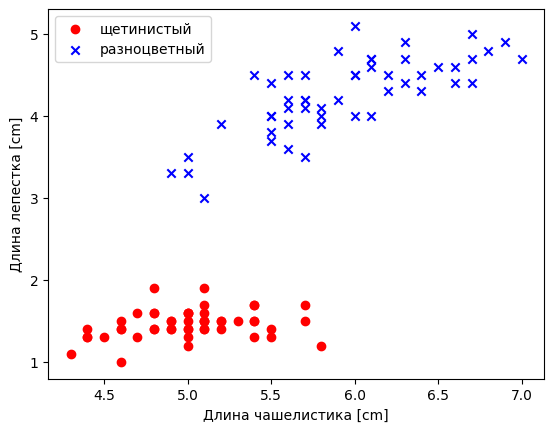

In [108]:
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='щетинистый')
plt.scatter(X[50:100,0], X[50:100,1], color='blue', marker='x', label='разноцветный')
plt.xlabel('Длина чашелистика [cm]')
plt.ylabel('Длина лепестка [cm]')
plt.legend(loc='upper left')
plt.show()

Функция для построения графика области решений

In [109]:
def plot_decision_regions(X, y, classifier, resolution=0.02):

    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
    np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8,
                    c=colors[idx], edgecolor='black', marker=markers[idx], label=cl)

Обучение Перцептрона.
Создание модели персептрона базового класса и обучение её на имеющихся данных при использовании скорости обучения lr=0.01 и длительности обучения n_iter=10.

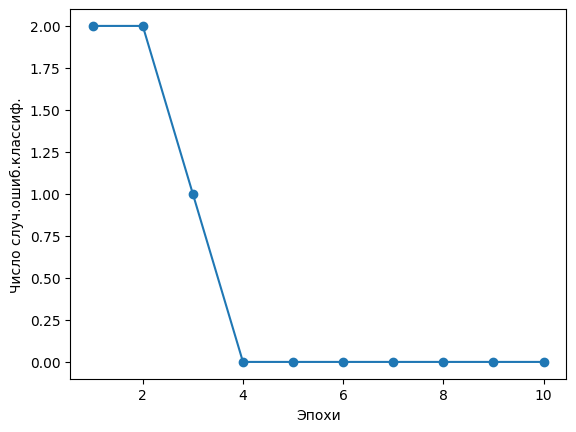

<ipython-input-109-2c3f9d4f16cd>:18: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8,


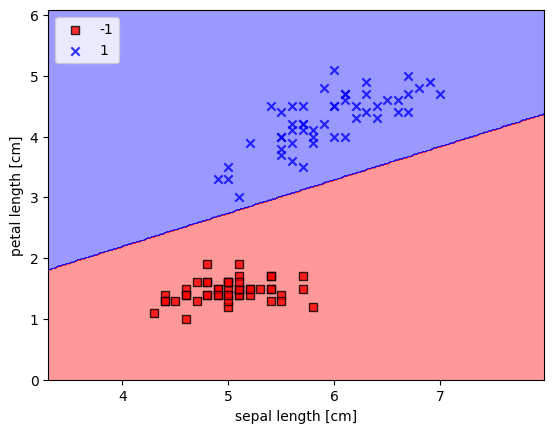

In [110]:
ppn=Perceptron(lr=0.01, n_iter=10)
ppn.fit(X,y)
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Эпохи')
plt.ylabel('Число случ.ошиб.классиф.')
plt.show()



plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

Реализация дочернего класса AdalineGD

In [111]:
class AdalineGD(Perceptron):
    def __init__(self, lr=0.01, n_iter=10,  shuffle=True, random_state=None, mode='pk' ) -> None:
        super().__init__(lr, n_iter)
        self.w_initialized=False
        self.shuffle=shuffle
        self.mode=mode
        if random_state:
            seed(random_state)

    def activation (self, X):
        return self.net_input(X)

    def _initialize_weights(self,m):
        self.w_=np.zeros(1+m)
        self.w_initialized=True

    def _shuffle(self, X, y):
        r=np.random.permutation(len(y))
        return X[r], y[r]

    def _update_weights(self, xi, target):
        output=self.net_input(xi)
        error=(target-output)
        self.w_[1:]+=self.lr*xi.dot(error)
        self.w_[0]+=self.lr*error
        cost=0.5*error**2
        return cost

    def fit(self, X,y):
        if self.mode=="st":
          self._initialize_weights(X.shape[1])
          self.cost_=[]
          for i in range(self.n_iter):
            if self.shuffle:
              X,y=self._shuffle(X,y)
              cost=[]
              for xi, target in zip(X,y):
                cost.append(self._update_weights(xi, target))
              avg_cost=sum(cost)/len(y)
              self.cost_.append(avg_cost)
          return self
        else:
            self.w_=np.zeros(1+X.shape[1])
            self.costs_=[]
            for i in range(self.n_iter):
                output=self.net_input(X)
                errors=(y-output)
                self.w_[1:]+=self.lr*X.T.dot(errors)
                self.w_[0]+=self.lr*errors.sum()
                cost=(errors**2).sum()/2.0
                self.costs_.append(cost)
            return self

Обучение модели AdalinePGD при
значениях гиперпараметров длительности и скорости обучения n_iter=50, eta=0.0001

<ipython-input-109-2c3f9d4f16cd>:18: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8,


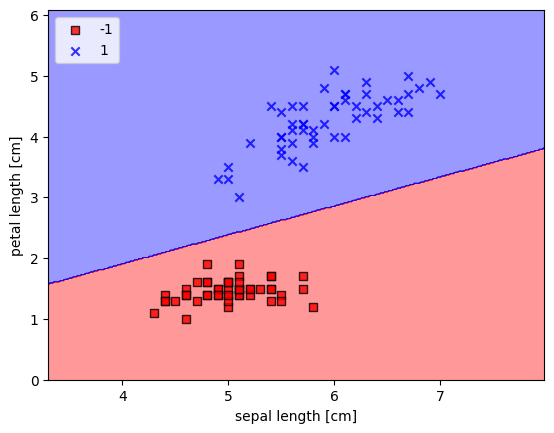

In [112]:
ada0=AdalineGD(lr=0.0001,n_iter=50,mode='pk')
ada0.fit(X, y)

plot_decision_regions(X, y, classifier=ada0)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

Обучение модели AdalinePGD при значениях гиперпараметров n_iter=10, eta=0.01

<ipython-input-109-2c3f9d4f16cd>:18: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8,


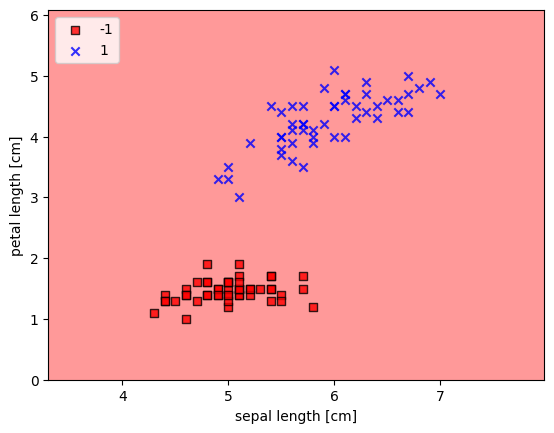

In [113]:
ada1=AdalineGD(lr=0.01,n_iter=10,mode='pk')
ada1.fit(X, y)

plot_decision_regions(X, y, classifier=ada1)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

А также n_iter=10,
eta=0.0001

<ipython-input-109-2c3f9d4f16cd>:18: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8,


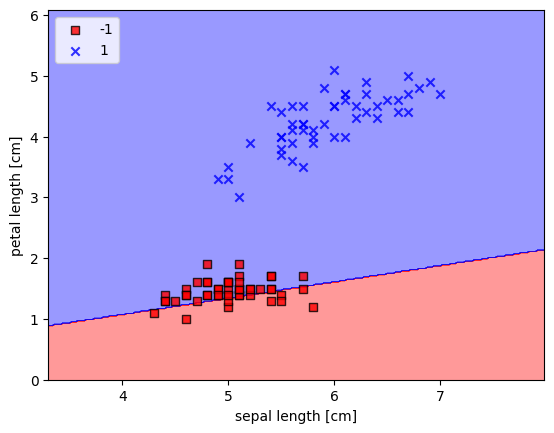

In [114]:
ada2=AdalineGD(lr=0.0001,n_iter=10,mode='pk')
ada2.fit(X, y)

plot_decision_regions(X, y, classifier=ada2)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

Построение графиков изменения среднеквадратической ошибки в процессе обучения.

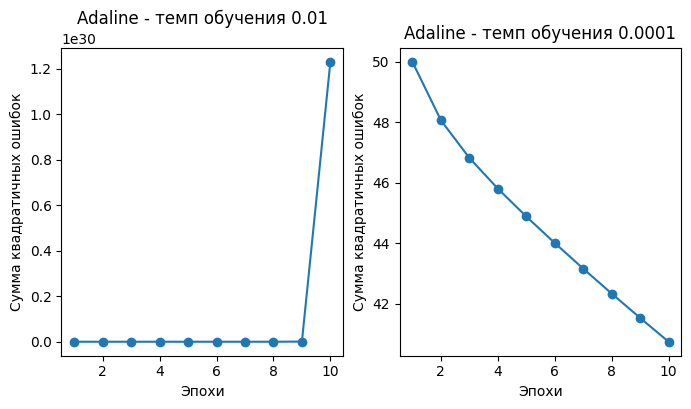

In [115]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
ax[0].plot(range(1, len(ada1.costs_) + 1), ada1.costs_, marker='o')
ax[0].set_xlabel('Эпохи')
ax[0].set_ylabel('Сумма квадратичных ошибок')
ax[0].set_title('Adaline - темп обучения 0.01')


ax[1].plot(range(1, len(ada2.costs_) + 1), ada2.costs_, marker='o')
ax[1].set_xlabel('Эпохи')
ax[1].set_ylabel('Сумма квадратичных ошибок')
ax[1].set_title('Adaline - темп обучения 0.0001')
plt.show()

При большом значении шага обоучения (lr) веса модели обновляются слишком быстро, что может привести к невозможности достижения оптимальных значений весов, в результате чего значение функции потерь будет увеличиваться.


Создание модели AdalineSGD, использующую для обучения стохастический градиентный спуск, и обучение её при
значениях гиперпараметров n_iter=15, eta=0.01.

<ipython-input-109-2c3f9d4f16cd>:18: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8,


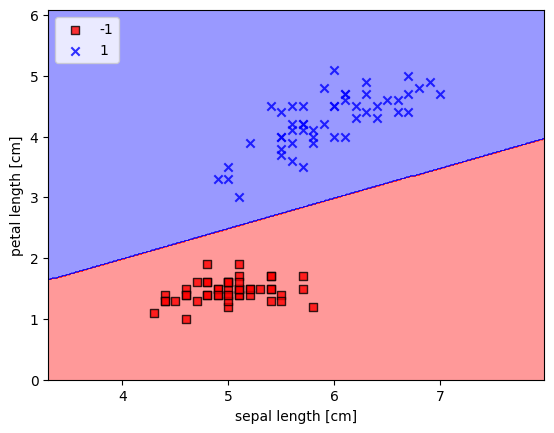

In [116]:
ada3=AdalineGD(lr=0.01,n_iter=15,mode='st')
ada3.fit(X, y)

plot_decision_regions(X, y, classifier=ada3)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()


Text(0.5, 1.0, 'Adaline - темп обучения 0.01, St')

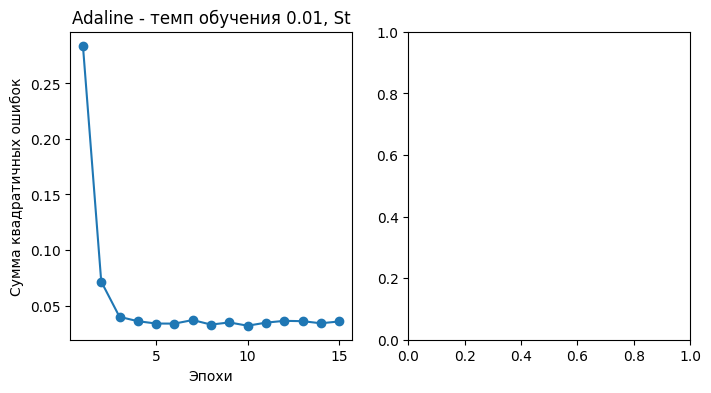

In [118]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
ax[0].plot(range(1, len(ada3.cost_) + 1), ada3.cost_, marker='o')
ax[0].set_xlabel('Эпохи')
ax[0].set_ylabel('Сумма квадратичных ошибок')
ax[0].set_title('Adaline - темп обучения 0.01, St')

Выводы
1. Были построны модели на основе как базовго класса Perceptron, так и дочернего класса AdalineGD с параметром, отвечающим за переключение между стахостическим и пакетным градиентными спусками
2. Осуществлено обучение полученных моделей на данных из iris_dataset с 2 параметрами и 2 классами и общим числом 100
3. Построен график расположения данных в пространстве признаков
4. Определены гиперпараметры позволяющие произвести обучение модели градиентного пакетного спуска на основе сравнения гарфиков области решения и изменения среднеквадратической ошибки в процессе обучения. Так при lr=0.001 модель не модет достигнеть оптимальных весов, в результате чего возрастает сумма квадратичных ощшибок и модель расходиться, что не наблюдаетя при lr=0.01
5. Было произвденно сравнение моделей стахостического и пакетного градиентного спуска. В результате поределено, что стахостический спуск позволяет достичь оптимального занчения весов за меньшее число эпох при одинаковых занчения lr.